In [2]:
# MNIST ANN

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

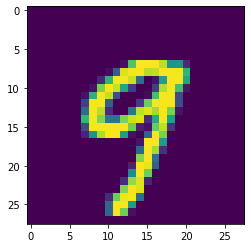

In [7]:
plt.imshow(X_train[45])

In [8]:
X_test.max()

255

In [9]:
X_train.max()

255

In [12]:
# Scaling: Max  = 255

X_train = X_train/X_train.max()
X_test = X_test/X_test.max()

In [88]:
# Generate model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(320, activation = "relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation = "softmax"),])

model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [89]:
classifier = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2295 - accuracy: 0.9324 - val_loss: 0.1226 - val_accuracy: 0.9633
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0988 - accuracy: 0.9707 - val_loss: 0.0912 - val_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0660 - accuracy: 0.9792 - val_loss: 0.0731 - val_accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.0635 - val_accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0394 - accuracy: 0.9870 - val_loss: 0.0662 - val_accuracy: 0.9795
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0639 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0260 - accuracy: 0.9915 - val_loss: 0.0625 - val_accuracy:

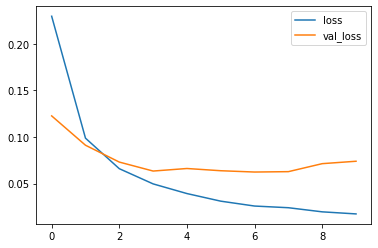

In [90]:
# Evaluate

plt.plot(classifier.history['loss'], label = "loss")
plt.plot(classifier.history['val_loss'], label = "val_loss")
plt.legend()

In [91]:
# Showing Losses

print("Training losses are: " , model.evaluate(X_train,y_train))
print("Test losses are: ", model.evaluate(X_test,y_test))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0103 - accuracy: 0.9967
Training losses are:  [0.010288534685969353, 0.9967333078384399]
313/313 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9805
Test losses are:  [0.07402946054935455, 0.9804999828338623]


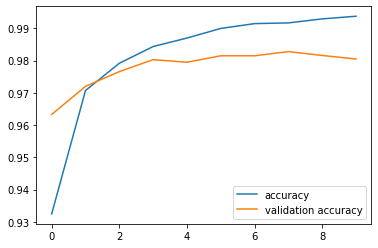

In [92]:
# Plotting evaluations - accuracy

plt.plot(classifier.history['accuracy'], label = 'accuracy')
plt.plot(classifier.history['val_accuracy'], label = 'validation accuracy')
plt.legend()